##### Problem statement
Given File 'startup_funding.csv'

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

###### Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

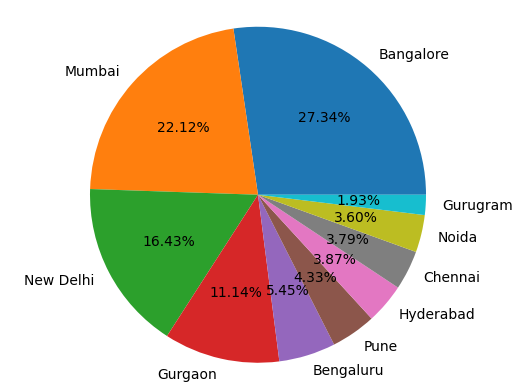

Bangalore 707
Mumbai 572
New Delhi 425
Gurgaon 288
Bengaluru 141
Pune 112
Hyderabad 100
Chennai 98
Noida 93
Gurugram 50


In [63]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "startup_funding.csv"
data = pd.read_csv(file_path,encoding='utf-8')

# data.head(2)
data.dropna(subset=['City  Location'],inplace=True)
def city_sep(city):
  if pd.isna(city):
    return None
  else:
    return city.split('/')[0].strip()

data['City  Location']=data['City  Location'].apply(city_sep)
data.loc[data['City  Location'].str.lower()=='banglore','City  Location']= 'Banglore'
data.loc[data['City  Location'].str.lower()=='Delhi','City  Location']= 'New Delhi'
data_city=data['City  Location'].value_counts()[:10]

plt.pie(x=data_city,labels=data_city.index,autopct='%.2f%%')
plt.axis('equal')
plt.show()
for i, j in data_city.items():
  print(i,j)

In [ ]:
import pandas as pd

# Load the data (replace with actual file path)
file_path = "startup_funding.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows with missing 'City  Location'
data.dropna(subset=['City  Location'], inplace=True)

# Function to handle the city split (taking the first location when multiple cities are present)
def city_sep(city):
    if pd.isna(city):
        return None
    else:
        # Split the city location by '/' and strip extra spaces, then return the first city
        return city.split('/')[0].strip()

# Apply the city separator function
data['City  Location'] = data['City  Location'].apply(city_sep)

# Normalize the city names (case insensitive)
# Ensure the city names are consistent (case insensitive matching)
data.loc[data['City  Location'].str.lower() == 'banglore', 'City  Location'] = 'Bangalore'
data.loc[data['City  Location'].str.lower() == 'delhi', 'City  Location'] = 'New Delhi'

# Let's check the unique city values after transformation
# print("Unique cities after normalization and splitting:")
# print(data['City  Location'].unique())

# Now let's group by 'City  Location' and count occurrences
data_city_size = data.groupby('City  Location').size().reset_index(name='city_data').sort_values(by='city_data', ascending=False)[:10]

# Use value_counts to count occurrences and get top 10 cities
data_city = data['City  Location'].value_counts().reset_index(name='city_data').sort_values(by='city_data', ascending=False)[:10]

# Print both outputs for comparison
print("\nCity Data (GroupBy and Size - Top 10):")
print(data_city_size)

print("\nCity Data (Value Counts - Top 10):")
print(data_city)



City Data (GroupBy and Size - Top 10):
   City  Location  city_data
6       Bangalore        707
48         Mumbai        572
51      New Delhi        459
25        Gurgaon        288
8       Bengaluru        141
58           Pune        112
30      Hyderabad        100
18        Chennai         98
54          Noida         93
26       Gurugram         50

City Data (Value Counts - Top 10):
  City  Location  city_data
0      Bangalore        707
1         Mumbai        572
2      New Delhi        459
3        Gurgaon        288
4      Bengaluru        141
5           Pune        112
6      Hyderabad        100
7        Chennai         98
8          Noida         93
9       Gurugram         50
